In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation, MaxPool2D
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
import sys
import glob
import argparse
#from keras import __version__
from tensorflow.keras import __version__
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
import skimage.io as io
import skimage.transform as trans
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as keras
from tensorflow.keras.regularizers import l2,l1
import pandas as pd
import datetime
from tensorflow.keras import backend as K
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
import cv2

input_shape = (224,224,3)
nbr_of_classes=38

#Encoder Start
base_model1 = tf.keras.applications.Xception(include_top=False, weights='imagenet',input_shape = input_shape)
x1_0 = base_model1.output
x1_0 = Flatten(name='Flatten1')(x1_0)
dense1 = Dense(256, name='fc1',activation='relu')(x1_0) 
x = classif_out_encoder1 = Dense(38, name='out1', activation = 'softmax')(dense1) # Latent Representation / Bottleneck

#Get Xception's tensors for skip connection.
conv14 = base_model1.get_layer('block14_sepconv2_act').output
conv13 = base_model1.get_layer('block13_sepconv2_bn').output
conv12 = base_model1.get_layer('block12_sepconv3_bn').output
conv11 = base_model1.get_layer('block11_sepconv3_bn').output
conv10 = base_model1.get_layer('block10_sepconv3_bn').output
conv9 = base_model1.get_layer('block9_sepconv3_bn').output
conv8 = base_model1.get_layer('block8_sepconv3_bn').output
conv7 = base_model1.get_layer('block7_sepconv3_bn').output
conv6 = base_model1.get_layer('block6_sepconv3_bn').output
conv5 = base_model1.get_layer('block5_sepconv3_bn').output
conv4 = base_model1.get_layer('block4_sepconv2_bn').output
conv3 = base_model1.get_layer('block3_sepconv2_bn').output
conv2 = base_model1.get_layer('block2_sepconv2_bn').output
conv1 = base_model1.get_layer('block1_conv2_act').output

#Decoder Start
dense2 = Dense(256, activation='relu')(x)

x = Add(name='first_merge')([dense1, dense2])
x = Dense(7*7*2048)(x)
reshape1 = Reshape((7, 7, 2048))(x)

#BLOCK 1
x = SeparableConv2D(2048, (3,3), padding='same', name='block14_start')(reshape1)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = concatenate([conv14, x], axis = 3)
x = SeparableConv2D(1536, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = c14 = Activation('relu')(x)

#BLOCK 2
x = UpSampling2D((2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(1024, (3,3), padding='same', name='block13_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv13, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c1314 = Conv2D(728, (1,1))(UpSampling2D()(c14))
x = add1 = Add()([c1314, x])

#BLOCK 3
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same', name='blockmiddle_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv12, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add2 = Add()([add1, x])
#BLOCK 4
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv11, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add3 = Add()([add2, x])
#BLOCK 5
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv10, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add4 = Add()([add3, x])
#BLOCK 6
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv9, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add5 = Add()([add4, x])
#BLOCK 7
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv8, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add6 = Add()([add5, x])
#BLOCK 8
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv7, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add7 = Add()([add6, x])
#BLOCK 9
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv6, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add8 = Add()([add7, x])
#BLOCK 10
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv5, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same', name ='blockmiddle_end')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add9 = Add()([add8, x])

#BLOCK 11
x = UpSampling2D((2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same', name='block4_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv4, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c45 = Conv2D(728, (1,1))(UpSampling2D()(add9))
x = add10 = Add()([c45, x])

#BLOCK 12
x = Conv2DTranspose(1, (3,3), strides=(2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(256, (3,3), padding='valid', name='block3_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv3, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c34 = Conv2D(256, (3,3), padding='valid')(Conv2DTranspose(1, (3,3), strides=(2,2))(add10))
x = add11 = Add()([c34, x])

#BLOCK 13
x = Conv2DTranspose(1, (3,3), strides=(2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3,3), padding='valid', name='block2_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv2, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c23 = Conv2D(128, (3,3), padding='valid')(Conv2DTranspose(1, (3,3), strides=(2,2))(add11))
x = add12 = Add()([c23, x])

#BLOCK 14
x = Conv2D(64, (3,3), padding='same', name='block1_start')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = concatenate([conv1, x], axis = 3)
x = ZeroPadding2D()(x)
x = Conv2D(32, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D()(x)
x = ZeroPadding2D()(x)

x = Conv2D(2, 3, activation = 'relu', padding = 'same',)(x)
mask = x = Conv2D(3, 1, activation = 'sigmoid',name='Mask')(x)

base_model2 = tf.keras.applications.Xception(include_top=False, weights='imagenet',input_shape = (224,224,3))
x2_0 = base_model2(mask)
x2_0 = Flatten(name='Flatten2')(x2_0)
x2_1 = Dense(256, name='fc2',activation='relu')(x2_0) 
classif_out_encoder2  = Dense(nbr_of_classes, name='out2',activation='softmax')(x2_1)

#Create ResTS Model
model = Model(base_model1.input, [classif_out_encoder1, classif_out_encoder2])

#Compile the mode to use multi-task learning
losses = {
        "out1": 'categorical_crossentropy',
        "out2": 'categorical_crossentropy'
        }
alpha=0.4
lossWeights = {"out1": alpha, "out2": (1.0-alpha)}
model.compile(optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), loss=losses, loss_weights=lossWeights, metrics = ['accuracy'])
#model.summary()

def preprocess_image(image_path,image_size = (224,224)):
    original_image = image.load_img(image_path , target_size=image_size)
    img = image.img_to_array(original_image)
    img = np.expand_dims(img, axis=0)
    img = xception_preprocess_input(img)
    return original_image,img

def build_visualization(model_weights_path):
    model.load_weights(model_weights_path)
    layer_name ='Mask'
    NewInput = model.get_layer(layer_name).output
    visualization = K.function([model.input], [NewInput])
    return visualization,model

def reduce_channels_sequare(heatmap):
    channel1 = heatmap[:,:,0]
    channel2 = heatmap[:,:,1]
    channel3 = heatmap[:,:,2]
    new_heatmap = np.sqrt(((channel1-0.149)*(channel1-0.149))+((channel2-0.1529)*(channel2-0.1529))+((channel3-0.3412)*(channel3-0.3412)))
    return new_heatmap
	
def postprocess_vis(heatmap1,threshould = 0.9):
    heatmap=heatmap1.copy()
    heatmap = (heatmap - heatmap.min())/(heatmap.max() - heatmap.min())
    heatmap = reduce_channels_sequare(heatmap)
    heatmap = (heatmap - heatmap.min())/(heatmap.max() - heatmap.min())
    heatmap[heatmap>threshould] = 1
    heatmap = heatmap*255
    return heatmap

def visualize_image(visualization,image_path,out_folder):
    base=os.path.basename(image_path)
    image_name= os.path.splitext(base)[0]
    original_image,img = preprocess_image(image_path)
    vis = visualization([img])[0][0]
    disease = model.predict(img)[0]
    probab = max(disease[0])
    disease = np.argmax(disease)
    disease_arr = ['Apple scab','Apple Black rot','Apple Cedar apple rust','Apple healthy','Blueberry healthy','Cherry (including sour) Powdery mildew','Cherry (including sour) healthy',
 'Corn (maize) Cercospora leaf spot Gray leaf spot',
 'Corn (maize) Common rust ',
 'Corn (maize) Northern Leaf Blight',
 'Corn (maize) healthy',
 'Grape Black rot',
 'Grape Esca (Black Measles)',
 'Grape Leaf blight (Isariopsis Leaf Spot)',
 'Grape healthy',
 'Orange Haunglongbing (Citrus greening)',
 'Peach Bacterial spot',
 'Peach healthy',
 'Pepper, bell Bacterial spot',
 'Pepper, bell healthy',
 'Potato Early blight',
 'Potato Late blight',
 'Potato healthy',
 'Raspberry healthy',
 'Soybean healthy',
 'Squash Powdery mildew',
 'Strawberry Leaf scorch',
 'Strawberry healthy',
 'Tomato Bacterial spot',
 'Tomato Early blight',
 'Tomato Late blight',
 'Tomato Leaf Mold',
 'Tomato Septoria leaf spot',
 'Tomato Spider mites Two-spotted spider mite',
 'Tomato Target Spot',
 'Tomato Yellow Leaf Curl Virus',
 'Tomato mosaic virus',
 'Tomato healthy']
    print('Disease predicted: ' + disease_arr[disease] + ' | Accuracy: ' + str(probab * 100) + '%')
    #print(probab)
    
    '''
    c1 =vis[:,:,0]
    c2 =vis[:,:,1]
    c3 =vis[:,:,2]

    vis[:,:,0] = c3
    vis[:,:,1] = c2
    vis[:,:,2] = c1
    '''
    
    heatmap = postprocess_vis(vis)
    
    #to save the heatmaps and reconstructed images in another format. 
    #Heatmaps will be in reduced channels format. While reconstructed image tensors will be multiplied by 255.

    vis_path = os.path.join(out_folder,image_name+'_vis.jpg')
    cv2.imwrite(vis_path,vis)

    heatmap_path = os.path.join(out_folder,image_name+'_heatmap.jpg')
    cv2.imwrite(heatmap_path,heatmap)
    
    f, axarr = plt.subplots(1,3, figsize=(7, 25))
    axarr[0].imshow(original_image)
    axarr[0].set_title('Original image')
    axarr[0].axis('off')
    axarr[1].imshow(vis)
    axarr[1].set_title('Reconstructed image')
    axarr[1].axis('off')
    axarr[2].imshow(heatmap,cmap='Reds')
    axarr[2].set_title('Heatmap')
    axarr[2].axis('off')
    
    plt.show()
    
    
def visualize_folder(visualization,images_folder,out_folder):	
    if not os.path.exists(out_folder):
        os.makedirs(out_folder)
    for path in os.listdir(images_folder):
		    print(path)
		    image_path = os.path.join(images_folder,path)
		    visualize_image(visualization,image_path,out_folder)

visualization,model = build_visualization('model/ResTS.h5')

images_folder = 'visualizations'
out_folder = 'images'
visualize_folder(visualization,images_folder,out_folder)

c:\python3.9.5\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


OSError: Unable to open file (unable to open file: name = 'model/ResTS.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation, MaxPool2D
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
import sys
import glob
import argparse
#from keras import __version__
from tensorflow.keras import __version__
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
import skimage.io as io
import skimage.transform as trans
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as keras
from tensorflow.keras.regularizers import l2,l1
import pandas as pd
import datetime
from tensorflow.keras import backend as K
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
import cv2

input_shape = (224,224,3)
nbr_of_classes=38

#Encoder Start
base_model1 = tf.keras.applications.Xception(include_top=False, weights='imagenet',input_shape = input_shape)
x1_0 = base_model1.output
x1_0 = Flatten(name='Flatten1')(x1_0)
dense1 = Dense(256, name='fc1',activation='relu')(x1_0) 
x = classif_out_encoder1 = Dense(38, name='out1', activation = 'softmax')(dense1) # Latent Representation / Bottleneck

#Get Xception's tensors for skip connection.
conv14 = base_model1.get_layer('block14_sepconv2_act').output
conv13 = base_model1.get_layer('block13_sepconv2_bn').output
conv12 = base_model1.get_layer('block12_sepconv3_bn').output
conv11 = base_model1.get_layer('block11_sepconv3_bn').output
conv10 = base_model1.get_layer('block10_sepconv3_bn').output
conv9 = base_model1.get_layer('block9_sepconv3_bn').output
conv8 = base_model1.get_layer('block8_sepconv3_bn').output
conv7 = base_model1.get_layer('block7_sepconv3_bn').output
conv6 = base_model1.get_layer('block6_sepconv3_bn').output
conv5 = base_model1.get_layer('block5_sepconv3_bn').output
conv4 = base_model1.get_layer('block4_sepconv2_bn').output
conv3 = base_model1.get_layer('block3_sepconv2_bn').output
conv2 = base_model1.get_layer('block2_sepconv2_bn').output
conv1 = base_model1.get_layer('block1_conv2_act').output

#Decoder Start
dense2 = Dense(256, activation='relu')(x)

x = Add(name='first_merge')([dense1, dense2])
x = Dense(7*7*2048)(x)
reshape1 = Reshape((7, 7, 2048))(x)

#BLOCK 1
x = SeparableConv2D(2048, (3,3), padding='same', name='block14_start')(reshape1)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = concatenate([conv14, x], axis = 3)
x = SeparableConv2D(1536, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = c14 = Activation('relu')(x)

#BLOCK 2
x = UpSampling2D((2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(1024, (3,3), padding='same', name='block13_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv13, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c1314 = Conv2D(728, (1,1))(UpSampling2D()(c14))
x = add1 = Add()([c1314, x])

#BLOCK 3
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same', name='blockmiddle_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv12, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add2 = Add()([add1, x])
#BLOCK 4
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv11, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add3 = Add()([add2, x])
#BLOCK 5
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv10, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add4 = Add()([add3, x])
#BLOCK 6
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv9, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add5 = Add()([add4, x])
#BLOCK 7
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv8, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add6 = Add()([add5, x])
#BLOCK 8
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv7, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add7 = Add()([add6, x])
#BLOCK 9
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv6, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add8 = Add()([add7, x])
#BLOCK 10
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv5, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same', name ='blockmiddle_end')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add9 = Add()([add8, x])

#BLOCK 11
x = UpSampling2D((2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same', name='block4_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv4, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c45 = Conv2D(728, (1,1))(UpSampling2D()(add9))
x = add10 = Add()([c45, x])

#BLOCK 12
x = Conv2DTranspose(1, (3,3), strides=(2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(256, (3,3), padding='valid', name='block3_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv3, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c34 = Conv2D(256, (3,3), padding='valid')(Conv2DTranspose(1, (3,3), strides=(2,2))(add10))
x = add11 = Add()([c34, x])

#BLOCK 13
x = Conv2DTranspose(1, (3,3), strides=(2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3,3), padding='valid', name='block2_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv2, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c23 = Conv2D(128, (3,3), padding='valid')(Conv2DTranspose(1, (3,3), strides=(2,2))(add11))
x = add12 = Add()([c23, x])

#BLOCK 14
x = Conv2D(64, (3,3), padding='same', name='block1_start')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = concatenate([conv1, x], axis = 3)
x = ZeroPadding2D()(x)
x = Conv2D(32, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D()(x)
x = ZeroPadding2D()(x)

x = Conv2D(2, 3, activation = 'relu', padding = 'same',)(x)
mask = x = Conv2D(3, 1, activation = 'sigmoid',name='Mask')(x)

base_model2 = tf.keras.applications.Xception(include_top=False, weights='imagenet',input_shape = (224,224,3))
x2_0 = base_model2(mask)
x2_0 = Flatten(name='Flatten2')(x2_0)
x2_1 = Dense(256, name='fc2',activation='relu')(x2_0) 
classif_out_encoder2  = Dense(nbr_of_classes, name='out2',activation='softmax')(x2_1)

#Create ResTS Model
model = Model(base_model1.input, [classif_out_encoder1, classif_out_encoder2])

#Compile the mode to use multi-task learning
losses = {
        "out1": 'categorical_crossentropy',
        "out2": 'categorical_crossentropy'
        }
alpha=0.4
lossWeights = {"out1": alpha, "out2": (1.0-alpha)}
model.compile(optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), loss=losses, loss_weights=lossWeights, metrics = ['accuracy'])
#model.summary()

def preprocess_image(image_path,image_size = (224,224)):
    original_image = image.load_img(image_path , target_size=image_size)
    img = image.img_to_array(original_image)
    img = np.expand_dims(img, axis=0)
    img = xception_preprocess_input(img)
    return original_image,img

def build_visualization(model_weights_path):
    model.load_weights(model_weights_path)
    layer_name ='Mask'
    NewInput = model.get_layer(layer_name).output
    visualization = K.function([model.input], [NewInput])
    return visualization,model

def reduce_channels_sequare(heatmap):
    channel1 = heatmap[:,:,0]
    channel2 = heatmap[:,:,1]
    channel3 = heatmap[:,:,2]
    new_heatmap = np.sqrt(((channel1-0.149)*(channel1-0.149))+((channel2-0.1529)*(channel2-0.1529))+((channel3-0.3412)*(channel3-0.3412)))
    return new_heatmap
	
def postprocess_vis(heatmap1,threshould = 0.9):
    heatmap=heatmap1.copy()
    heatmap = (heatmap - heatmap.min())/(heatmap.max() - heatmap.min())
    heatmap = reduce_channels_sequare(heatmap)
    heatmap = (heatmap - heatmap.min())/(heatmap.max() - heatmap.min())
    heatmap[heatmap>threshould] = 1
    heatmap = heatmap*255
    return heatmap

def visualize_image(visualization,image_path,out_folder):
    base=os.path.basename(image_path)
    image_name= os.path.splitext(base)[0]
    original_image,img = preprocess_image(image_path)
    vis = visualization([img])[0][0] * 255
    
    '''
    c1 =vis[:,:,0]
    c2 =vis[:,:,1]
    c3 =vis[:,:,2]

    vis[:,:,0] = c3
    vis[:,:,1] = c2
    vis[:,:,2] = c1
    '''
    
    heatmap = postprocess_vis(vis)
    
    #to save the heatmaps and reconstructed images in another format. 
    #Heatmaps will be in reduced channels format. While reconstructed image tensors will be multiplied by 255.

    vis_path = os.path.join(out_folder,image_name+'_vis.jpg')
    cv2.imwrite(vis_path,vis)

    heatmap_path = os.path.join(out_folder,image_name+'_heatmap.jpg')
    cv2.imwrite(heatmap_path,heatmap)
    
    plt.show()
    
    
def visualize_folder(visualization,images_folder,out_folder):	
    if not os.path.exists(out_folder):
        os.makedirs(out_folder)
    for path in os.listdir(images_folder):
		    print(path)
		    image_path = os.path.join(images_folder,path)
		    visualize_image(visualization,image_path,out_folder)

visualization,model = build_visualization('model/XcepTS.h5')

images_folder = 'visualizations'
out_folder = 'images'
visualize_folder(visualization,images_folder,out_folder)

apple-healthy1.jpg
apple-healthy2.jpg
Apple-rot-color-bg.jpg
apple-scab1.jpg
apple-scab2.jpg
corn-healthy1.jpg
corn-healthy2.jpg
corn-rust1.jpg
corn-rust2.jpg
Potato-late-blight-color-bg.jpg
tomato-healthy1.jpg
tomato-healthy2.jpg
tomato-spo2.jpg
tomato-spot1.jpg
Tomato-target-spot-color-bg.jpg


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation, MaxPool2D
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
import sys
import glob
import argparse
#from keras import __version__
from tensorflow.keras import __version__
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
import skimage.io as io
import skimage.transform as trans
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as keras
from tensorflow.keras.regularizers import l2,l1
import pandas as pd
import datetime
from tensorflow.keras import backend as K
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
import cv2

input_shape = (224,224,3)
nbr_of_classes=38

#Encoder Start
base_model1 = tf.keras.applications.Xception(include_top=False, weights='imagenet',input_shape = input_shape)
x1_0 = base_model1.output
x1_0 = Flatten(name='Flatten1')(x1_0)
dense1 = Dense(256, name='fc1',activation='relu')(x1_0) 
x = classif_out_encoder1 = Dense(38, name='out1', activation = 'softmax')(dense1) # Latent Representation / Bottleneck

#Get Xception's tensors for skip connection.
conv14 = base_model1.get_layer('block14_sepconv2_act').output
conv13 = base_model1.get_layer('block13_sepconv2_bn').output
conv12 = base_model1.get_layer('block12_sepconv3_bn').output
conv11 = base_model1.get_layer('block11_sepconv3_bn').output
conv10 = base_model1.get_layer('block10_sepconv3_bn').output
conv9 = base_model1.get_layer('block9_sepconv3_bn').output
conv8 = base_model1.get_layer('block8_sepconv3_bn').output
conv7 = base_model1.get_layer('block7_sepconv3_bn').output
conv6 = base_model1.get_layer('block6_sepconv3_bn').output
conv5 = base_model1.get_layer('block5_sepconv3_bn').output
conv4 = base_model1.get_layer('block4_sepconv2_bn').output
conv3 = base_model1.get_layer('block3_sepconv2_bn').output
conv2 = base_model1.get_layer('block2_sepconv2_bn').output
conv1 = base_model1.get_layer('block1_conv2_act').output

#Decoder Start
dense2 = Dense(256, activation='relu')(x)

x = Add(name='first_merge')([dense1, dense2])
x = Dense(7*7*2048)(x)
reshape1 = Reshape((7, 7, 2048))(x)

#BLOCK 1
x = SeparableConv2D(2048, (3,3), padding='same', name='block14_start')(reshape1)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = concatenate([conv14, x], axis = 3)
x = SeparableConv2D(1536, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = c14 = Activation('relu')(x)

#BLOCK 2
x = UpSampling2D((2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(1024, (3,3), padding='same', name='block13_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv13, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c1314 = Conv2D(728, (1,1))(UpSampling2D()(c14))
x = add1 = Add()([c1314, x])

#BLOCK 3
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same', name='blockmiddle_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv12, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add2 = Add()([add1, x])
#BLOCK 4
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv11, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add3 = Add()([add2, x])
#BLOCK 5
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv10, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add4 = Add()([add3, x])
#BLOCK 6
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv9, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add5 = Add()([add4, x])
#BLOCK 7
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv8, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add6 = Add()([add5, x])
#BLOCK 8
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv7, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add7 = Add()([add6, x])
#BLOCK 9
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv6, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add8 = Add()([add7, x])
#BLOCK 10
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv5, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same', name ='blockmiddle_end')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add9 = Add()([add8, x])

#BLOCK 11
x = UpSampling2D((2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same', name='block4_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv4, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c45 = Conv2D(728, (1,1))(UpSampling2D()(add9))
x = add10 = Add()([c45, x])

#BLOCK 12
x = Conv2DTranspose(1, (3,3), strides=(2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(256, (3,3), padding='valid', name='block3_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv3, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c34 = Conv2D(256, (3,3), padding='valid')(Conv2DTranspose(1, (3,3), strides=(2,2))(add10))
x = add11 = Add()([c34, x])

#BLOCK 13
x = Conv2DTranspose(1, (3,3), strides=(2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3,3), padding='valid', name='block2_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv2, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c23 = Conv2D(128, (3,3), padding='valid')(Conv2DTranspose(1, (3,3), strides=(2,2))(add11))
x = add12 = Add()([c23, x])

#BLOCK 14
x = Conv2D(64, (3,3), padding='same', name='block1_start')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = concatenate([conv1, x], axis = 3)
x = ZeroPadding2D()(x)
x = Conv2D(32, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D()(x)
x = ZeroPadding2D()(x)

x = Conv2D(2, 3, activation = 'relu', padding = 'same',)(x)
mask = x = Conv2D(3, 1, activation = 'sigmoid',name='Mask')(x)

base_model2 = tf.keras.applications.Xception(include_top=False, weights='imagenet',input_shape = (224,224,3))
x2_0 = base_model2(mask)
x2_0 = Flatten(name='Flatten2')(x2_0)
x2_1 = Dense(256, name='fc2',activation='relu')(x2_0) 
classif_out_encoder2  = Dense(nbr_of_classes, name='out2',activation='softmax')(x2_1)

#Create ResTS Model
model = Model(base_model1.input, [classif_out_encoder1, classif_out_encoder2])

#Compile the mode to use multi-task learning
losses = {
        "out1": 'categorical_crossentropy',
        "out2": 'categorical_crossentropy'
        }
alpha=0.4
lossWeights = {"out1": alpha, "out2": (1.0-alpha)}
model.compile(optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), loss=losses, loss_weights=lossWeights, metrics = ['accuracy'])
#model.summary()

def preprocess_image(image_path,image_size = (224,224)):
    original_image = image.load_img(image_path , target_size=image_size)
    img = image.img_to_array(original_image)
    img = np.expand_dims(img, axis=0)
    img = xception_preprocess_input(img)
    return original_image,img

def build_visualization(model_weights_path):
    model.load_weights(model_weights_path)
    layer_name ='Mask'
    NewInput = model.get_layer(layer_name).output
    visualization = K.function([model.input], [NewInput])
    return visualization,model

def reduce_channels_sequare(heatmap):
    channel1 = heatmap[:,:,0]
    channel2 = heatmap[:,:,1]
    channel3 = heatmap[:,:,2]
    new_heatmap = np.sqrt(((channel1-0.149)*(channel1-0.149))+((channel2-0.1529)*(channel2-0.1529))+((channel3-0.3412)*(channel3-0.3412)))
    return new_heatmap
	
def postprocess_vis(heatmap1,threshould = 0.9):
    heatmap=heatmap1.copy()
    heatmap = (heatmap - heatmap.min())/(heatmap.max() - heatmap.min())
    heatmap = reduce_channels_sequare(heatmap)
    heatmap = (heatmap - heatmap.min())/(heatmap.max() - heatmap.min())
    heatmap[heatmap>threshould] = 1
    heatmap = heatmap*255
    return heatmap

def visualize_image(visualization,image_path,out_folder):
    base=os.path.basename(image_path)
    image_name= os.path.splitext(base)[0]
    original_image,img = preprocess_image(image_path)
    vis = visualization([img])[0][0]
    disease = model.predict(img)[0]
    probab = max(disease[0])
    disease = np.argmax(disease)
    disease_arr = ['Apple scab','Apple Black rot','Apple Cedar apple rust','Apple healthy','Blueberry healthy','Cherry (including sour) Powdery mildew','Cherry (including sour) healthy',
 'Corn (maize) Cercospora leaf spot Gray leaf spot',
 'Corn (maize) Common rust ',
 'Corn (maize) Northern Leaf Blight',
 'Corn (maize) healthy',
 'Grape Black rot',
 'Grape Esca (Black Measles)',
 'Grape Leaf blight (Isariopsis Leaf Spot)',
 'Grape healthy',
 'Orange Haunglongbing (Citrus greening)',
 'Peach Bacterial spot',
 'Peach healthy',
 'Pepper, bell Bacterial spot',
 'Pepper, bell healthy',
 'Potato Early blight',
 'Potato Late blight',
 'Potato healthy',
 'Raspberry healthy',
 'Soybean healthy',
 'Squash Powdery mildew',
 'Strawberry Leaf scorch',
 'Strawberry healthy',
 'Tomato Bacterial spot',
 'Tomato Early blight',
 'Tomato Late blight',
 'Tomato Leaf Mold',
 'Tomato Septoria leaf spot',
 'Tomato Spider mites Two-spotted spider mite',
 'Tomato Target Spot',
 'Tomato Yellow Leaf Curl Virus',
 'Tomato mosaic virus',
 'Tomato healthy']
    print('Disease predicted: ' + disease_arr[disease] + ' | Accuracy: ' + str(probab * 100) + '%')
    #print(probab)
    
    '''
    c1 =vis[:,:,0]
    c2 =vis[:,:,1]
    c3 =vis[:,:,2]

    vis[:,:,0] = c3
    vis[:,:,1] = c2
    vis[:,:,2] = c1
    '''
    
    heatmap = postprocess_vis(vis)
    
    #to save the heatmaps and reconstructed images in another format. 
    #Heatmaps will be in reduced channels format. While reconstructed image tensors will be multiplied by 255.

    vis_path = os.path.join(out_folder,image_name+'_vis.jpg')
    cv2.imwrite(vis_path,vis)

    heatmap_path = os.path.join(out_folder,image_name+'_heatmap.jpg')
    cv2.imwrite(heatmap_path,heatmap)
    
    f, axarr = plt.subplots(1,3, figsize=(7, 25))
    axarr[0].imshow(original_image)
    axarr[0].set_title('Original image')
    axarr[0].axis('off')
    axarr[1].imshow(vis)
    axarr[1].set_title('Reconstructed image')
    axarr[1].axis('off')
    axarr[2].imshow(heatmap,cmap='Reds')
    axarr[2].set_title('Heatmap')
    axarr[2].axis('off')
    
    plt.show()
    
    
def visualize_folder(visualization,images_folder,out_folder):	
    if not os.path.exists(out_folder):
        os.makedirs(out_folder)
    for path in os.listdir(images_folder):
		    print(path)
		    image_path = os.path.join(images_folder,path)
		    visualize_image(visualization,image_path,out_folder)

visualization,model = build_visualization('model/ResTS.h5')

images_folder = 'visualizations'
out_folder = 'images'
visualize_folder(visualization,images_folder,out_folder)

OSError: Unable to open file (unable to open file: name = 'model/ResTS.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

apple-healthy1.jpg
Disease predicted: Apple healthy | Accuracy: 94.89885568618774%


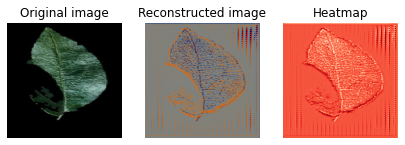

apple-healthy2.jpg
Disease predicted: Apple healthy | Accuracy: 99.99641180038452%


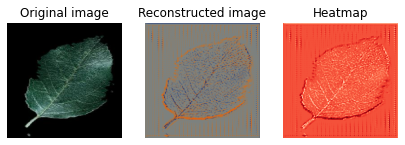

Apple-rot-color-bg.jpg
Disease predicted: Apple Black rot | Accuracy: 86.09200716018677%


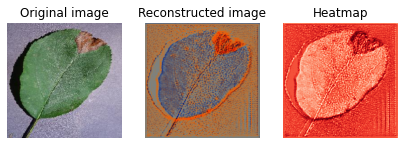

apple-scab1.jpg
Disease predicted: Apple scab | Accuracy: 99.99109506607056%


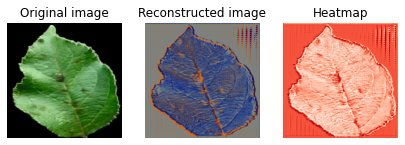

apple-scab2.jpg
Disease predicted: Apple scab | Accuracy: 98.22490215301514%


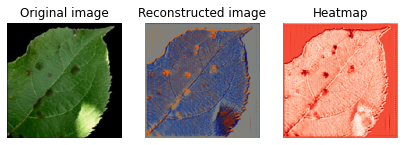

corn-healthy1.jpg
Disease predicted: Corn (maize) healthy | Accuracy: 99.99943971633911%


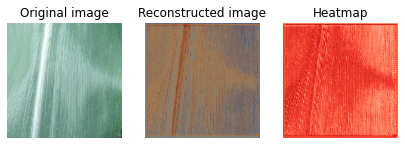

corn-healthy2.jpg
Disease predicted: Corn (maize) healthy | Accuracy: 99.89891648292542%


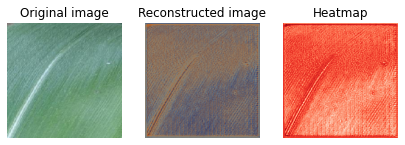

corn-rust1.jpg
Disease predicted: Corn (maize) Common rust  | Accuracy: 99.94072914123535%


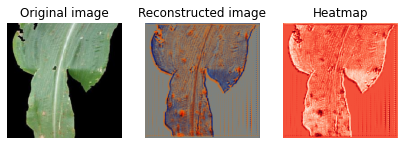

corn-rust2.jpg
Disease predicted: Corn (maize) Common rust  | Accuracy: 96.6779351234436%


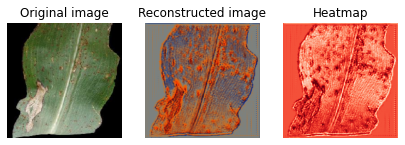

Potato-late-blight-color-bg.jpg
Disease predicted: Tomato Late blight | Accuracy: 58.65924954414368%


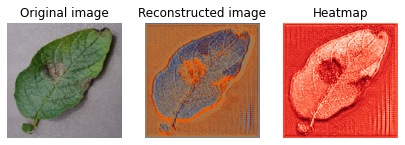

tomato-healthy1.jpg
Disease predicted: Tomato healthy | Accuracy: 100.0%


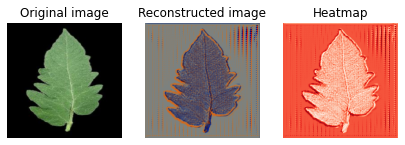

tomato-healthy2.jpg
Disease predicted: Tomato healthy | Accuracy: 98.07577133178711%


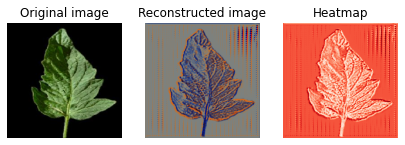

tomato-spo2.jpg
Disease predicted: Tomato Bacterial spot | Accuracy: 99.98538494110107%


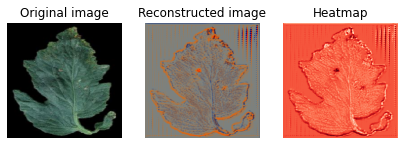

tomato-spot1.jpg
Disease predicted: Tomato Bacterial spot | Accuracy: 99.92616772651672%


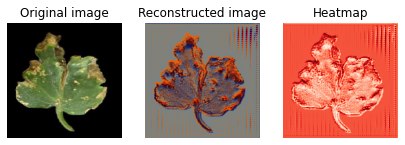

Tomato-target-spot-color-bg.jpg
Disease predicted: Pepper, bell Bacterial spot | Accuracy: 36.69542670249939%


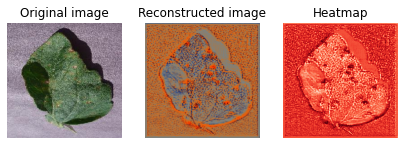

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Activation, MaxPool2D
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
import sys
import glob
import argparse
#from keras import __version__
from tensorflow.keras import __version__
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
import skimage.io as io
import skimage.transform as trans
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as keras
from tensorflow.keras.regularizers import l2,l1
import pandas as pd
import datetime
from tensorflow.keras import backend as K
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
import cv2

input_shape = (224,224,3)
nbr_of_classes=38

#Encoder Start
base_model1 = tf.keras.applications.Xception(include_top=False, weights='imagenet',input_shape = input_shape)
x1_0 = base_model1.output
x1_0 = Flatten(name='Flatten1')(x1_0)
dense1 = Dense(256, name='fc1',activation='relu')(x1_0) 
x = classif_out_encoder1 = Dense(38, name='out1', activation = 'softmax')(dense1) # Latent Representation / Bottleneck

#Get Xception's tensors for skip connection.
conv14 = base_model1.get_layer('block14_sepconv2_act').output
conv13 = base_model1.get_layer('block13_sepconv2_bn').output
conv12 = base_model1.get_layer('block12_sepconv3_bn').output
conv11 = base_model1.get_layer('block11_sepconv3_bn').output
conv10 = base_model1.get_layer('block10_sepconv3_bn').output
conv9 = base_model1.get_layer('block9_sepconv3_bn').output
conv8 = base_model1.get_layer('block8_sepconv3_bn').output
conv7 = base_model1.get_layer('block7_sepconv3_bn').output
conv6 = base_model1.get_layer('block6_sepconv3_bn').output
conv5 = base_model1.get_layer('block5_sepconv3_bn').output
conv4 = base_model1.get_layer('block4_sepconv2_bn').output
conv3 = base_model1.get_layer('block3_sepconv2_bn').output
conv2 = base_model1.get_layer('block2_sepconv2_bn').output
conv1 = base_model1.get_layer('block1_conv2_act').output

#Decoder Start
dense2 = Dense(256, activation='relu')(x)

x = Add(name='first_merge')([dense1, dense2])
x = Dense(7*7*2048)(x)
reshape1 = Reshape((7, 7, 2048))(x)

#BLOCK 1
x = SeparableConv2D(2048, (3,3), padding='same', name='block14_start')(reshape1)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = concatenate([conv14, x], axis = 3)
x = SeparableConv2D(1536, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = c14 = Activation('relu')(x)

#BLOCK 2
x = UpSampling2D((2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(1024, (3,3), padding='same', name='block13_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv13, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c1314 = Conv2D(728, (1,1))(UpSampling2D()(c14))
x = add1 = Add()([c1314, x])

#BLOCK 3
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same', name='blockmiddle_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv12, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add2 = Add()([add1, x])
#BLOCK 4
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv11, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add3 = Add()([add2, x])
#BLOCK 5
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv10, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add4 = Add()([add3, x])
#BLOCK 6
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv9, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add5 = Add()([add4, x])
#BLOCK 7
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv8, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add6 = Add()([add5, x])
#BLOCK 8
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv7, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add7 = Add()([add6, x])
#BLOCK 9
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv6, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add8 = Add()([add7, x])
#BLOCK 10
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = concatenate([conv5, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same', name ='blockmiddle_end')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = add9 = Add()([add8, x])

#BLOCK 11
x = UpSampling2D((2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same', name='block4_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv4, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(728, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c45 = Conv2D(728, (1,1))(UpSampling2D()(add9))
x = add10 = Add()([c45, x])

#BLOCK 12
x = Conv2DTranspose(1, (3,3), strides=(2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(256, (3,3), padding='valid', name='block3_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv3, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c34 = Conv2D(256, (3,3), padding='valid')(Conv2DTranspose(1, (3,3), strides=(2,2))(add10))
x = add11 = Add()([c34, x])

#BLOCK 13
x = Conv2DTranspose(1, (3,3), strides=(2,2))(x)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3,3), padding='valid', name='block2_start')(x)
x = BatchNormalization()(x)
x = concatenate([conv2, x], axis = 3)
x = Activation('relu')(x)
x = SeparableConv2D(128, (3,3), padding='same')(x)
x = BatchNormalization()(x)

c23 = Conv2D(128, (3,3), padding='valid')(Conv2DTranspose(1, (3,3), strides=(2,2))(add11))
x = add12 = Add()([c23, x])

#BLOCK 14
x = Conv2D(64, (3,3), padding='same', name='block1_start')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = concatenate([conv1, x], axis = 3)
x = ZeroPadding2D()(x)
x = Conv2D(32, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D()(x)
x = ZeroPadding2D()(x)

x = Conv2D(2, 3, activation = 'relu', padding = 'same',)(x)
mask = x = Conv2D(3, 1, activation = 'sigmoid',name='Mask')(x)

base_model2 = tf.keras.applications.Xception(include_top=False, weights='imagenet',input_shape = (224,224,3))
x2_0 = base_model2(mask)
x2_0 = Flatten(name='Flatten2')(x2_0)
x2_1 = Dense(256, name='fc2',activation='relu')(x2_0) 
classif_out_encoder2  = Dense(nbr_of_classes, name='out2',activation='softmax')(x2_1)

#Create ResTS Model
model = Model(base_model1.input, [classif_out_encoder1, classif_out_encoder2])

#Compile the mode to use multi-task learning
losses = {
        "out1": 'categorical_crossentropy',
        "out2": 'categorical_crossentropy'
        }
alpha=0.4
lossWeights = {"out1": alpha, "out2": (1.0-alpha)}
model.compile(optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), loss=losses, loss_weights=lossWeights, metrics = ['accuracy'])
#model.summary()

def preprocess_image(image_path,image_size = (224,224)):
    original_image = image.load_img(image_path , target_size=image_size)
    img = image.img_to_array(original_image)
    img = np.expand_dims(img, axis=0)
    img = xception_preprocess_input(img)
    return original_image,img

def build_visualization(model_weights_path):
    model.load_weights(model_weights_path)
    layer_name ='Mask'
    NewInput = model.get_layer(layer_name).output
    visualization = K.function([model.input], [NewInput])
    return visualization,model

def reduce_channels_sequare(heatmap):
    channel1 = heatmap[:,:,0]
    channel2 = heatmap[:,:,1]
    channel3 = heatmap[:,:,2]
    new_heatmap = np.sqrt(((channel1-0.149)*(channel1-0.149))+((channel2-0.1529)*(channel2-0.1529))+((channel3-0.3412)*(channel3-0.3412)))
    return new_heatmap
	
def postprocess_vis(heatmap1,threshould = 0.9):
    heatmap=heatmap1.copy()
    heatmap = (heatmap - heatmap.min())/(heatmap.max() - heatmap.min())
    heatmap = reduce_channels_sequare(heatmap)
    heatmap = (heatmap - heatmap.min())/(heatmap.max() - heatmap.min())
    heatmap[heatmap>threshould] = 1
    heatmap = heatmap*255
    return heatmap

def visualize_image(visualization,image_path,out_folder):
    base=os.path.basename(image_path)
    image_name= os.path.splitext(base)[0]
    original_image,img = preprocess_image(image_path)
    vis = visualization([img])[0][0]
    disease = model.predict(img)[0]
    probab = max(disease[0])
    disease = np.argmax(disease)
    disease_arr = ['Apple scab','Apple Black rot','Apple Cedar apple rust','Apple healthy','Blueberry healthy','Cherry (including sour) Powdery mildew','Cherry (including sour) healthy',
 'Corn (maize) Cercospora leaf spot Gray leaf spot',
 'Corn (maize) Common rust ',
 'Corn (maize) Northern Leaf Blight',
 'Corn (maize) healthy',
 'Grape Black rot',
 'Grape Esca (Black Measles)',
 'Grape Leaf blight (Isariopsis Leaf Spot)',
 'Grape healthy',
 'Orange Haunglongbing (Citrus greening)',
 'Peach Bacterial spot',
 'Peach healthy',
 'Pepper, bell Bacterial spot',
 'Pepper, bell healthy',
 'Potato Early blight',
 'Potato Late blight',
 'Potato healthy',
 'Raspberry healthy',
 'Soybean healthy',
 'Squash Powdery mildew',
 'Strawberry Leaf scorch',
 'Strawberry healthy',
 'Tomato Bacterial spot',
 'Tomato Early blight',
 'Tomato Late blight',
 'Tomato Leaf Mold',
 'Tomato Septoria leaf spot',
 'Tomato Spider mites Two-spotted spider mite',
 'Tomato Target Spot',
 'Tomato Yellow Leaf Curl Virus',
 'Tomato mosaic virus',
 'Tomato healthy']
    print('Disease predicted: ' + disease_arr[disease] + ' | Accuracy: ' + str(probab * 100) + '%')
    #print(probab)
    
    '''
    c1 =vis[:,:,0]
    c2 =vis[:,:,1]
    c3 =vis[:,:,2]

    vis[:,:,0] = c3
    vis[:,:,1] = c2
    vis[:,:,2] = c1
    '''
    
    heatmap = postprocess_vis(vis)
    
    #to save the heatmaps and reconstructed images in another format. 
    #Heatmaps will be in reduced channels format. While reconstructed image tensors will be multiplied by 255.

    vis_path = os.path.join(out_folder,image_name+'_vis.jpg')
    cv2.imwrite(vis_path,vis)

    heatmap_path = os.path.join(out_folder,image_name+'_heatmap.jpg')
    cv2.imwrite(heatmap_path,heatmap)
    
    f, axarr = plt.subplots(1,3, figsize=(7, 25))
    axarr[0].imshow(original_image)
    axarr[0].set_title('Original image')
    axarr[0].axis('off')
    axarr[1].imshow(vis)
    axarr[1].set_title('Reconstructed image')
    axarr[1].axis('off')
    axarr[2].imshow(heatmap,cmap='Reds')
    axarr[2].set_title('Heatmap')
    axarr[2].axis('off')
    
    plt.show()
    
    
def visualize_folder(visualization,images_folder,out_folder):	
    if not os.path.exists(out_folder):
        os.makedirs(out_folder)
    for path in os.listdir(images_folder):
		    print(path)
		    image_path = os.path.join(images_folder,path)
		    visualize_image(visualization,image_path,out_folder)

visualization,model = build_visualization('model/XcepTS.h5')

images_folder = 'visualizations'
out_folder = 'images'
visualize_folder(visualization,images_folder,out_folder)